Image: ../Experiments/DenoisedImages/RealPatientDataDenoising/BM3D/denoised_image_BM3D1.png
SNR: 1.1508561378990079, CNR: 0.04956639634020365
Image: ../Experiments/DenoisedImages/RealPatientDataDenoising/NLM/denoised_image_NLM1.png
SNR: 1.1365089669250816, CNR: 0.04985769108234748
Image: ../Experiments/DenoisedImages/RealPatientDataDenoising/TV/denoised_image_TV1.png
SNR: 1.2555774196741991, CNR: 0.05702005813812822
Image: ../Experiments/DenoisedImages/RealPatientDataDenoising/BM4D/denoised_image_BM4D2.png
SNR: 1.4356523775008614, CNR: -0.020106113520649532


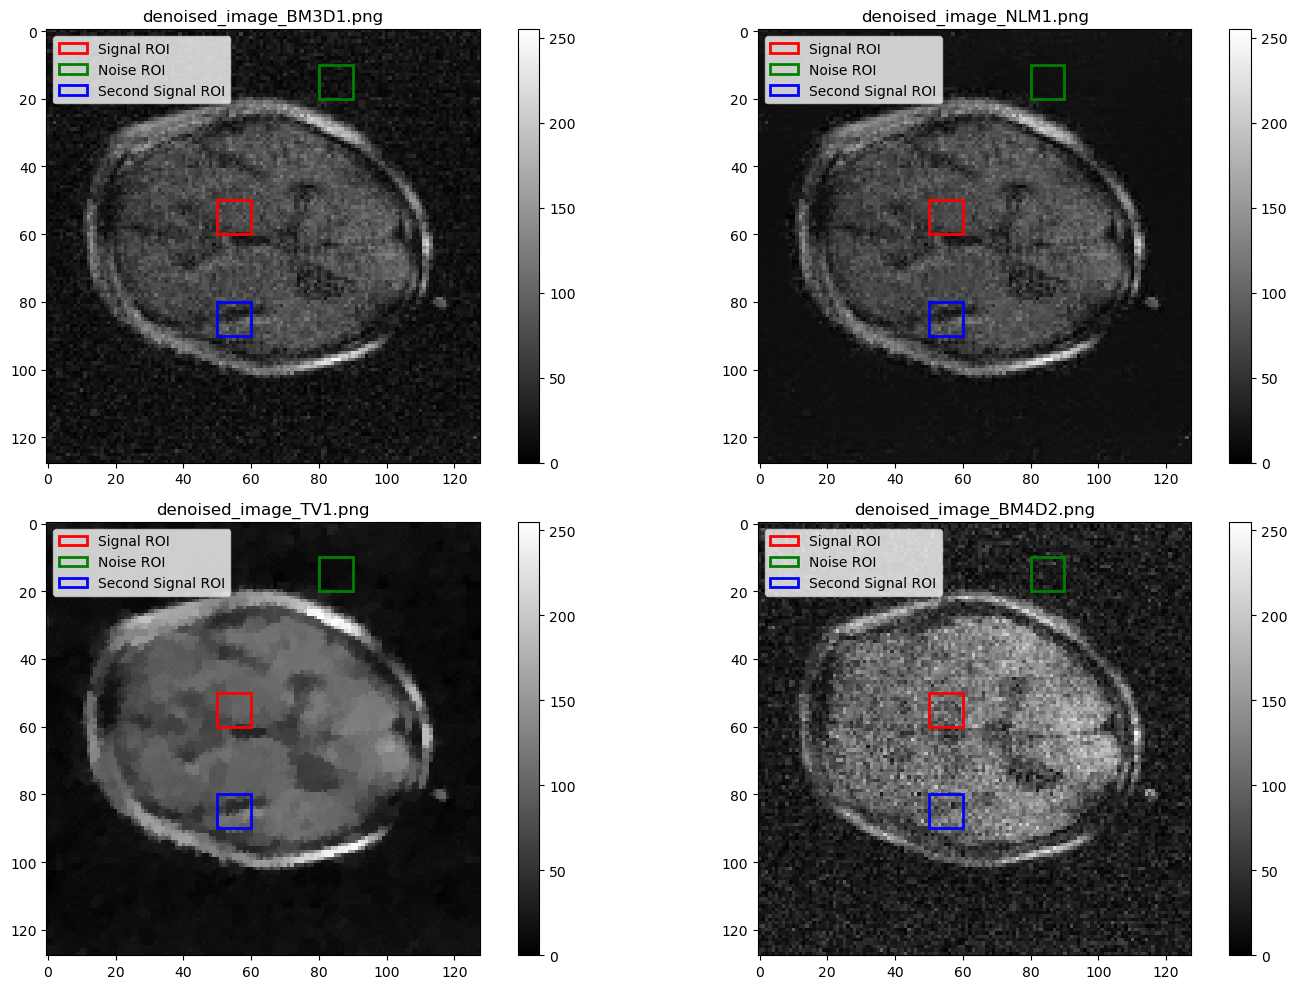

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords):
    """
    Calculates SNR and CNR for a given image with specified ROIs.

    Args:
        image_path (str): Path to the image file.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for CNR calculation.

    Returns:
        tuple: A tuple containing SNR and CNR values (SNR, CNR).
    """

    image = imread(image_path)

    # Adjust for grayscale (2D) or color (3D) images
    if image.ndim == 2:  # Grayscale image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width]
    else:  # Color image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width, :]

    x, y, width, height = roi_coords
    roi_signal = slice_func(x, y, width, height)
    mean_signal = np.mean(roi_signal)

    x, y, width, height = noise_coords
    roi_noise = slice_func(x, y, width, height)
    std_noise = np.std(roi_noise)

    snr = mean_signal / std_noise if std_noise != 0 else np.inf

    x, y, width, height = roi2_coords
    roi2_signal = slice_func(x, y, width, height)
    mean_signal2 = np.mean(roi2_signal)

    cnr = (mean_signal - mean_signal2) / std_noise if std_noise != 0 else np.inf

    return snr, cnr

def visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords):
    """
    Visualizes all images with ROIs highlighted.

    Args:
        image_paths (list): List of paths to image files.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for visualization.
    """

    num_images = len(image_paths)
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows

    plt.figure(figsize=(15, nrows * 5))  # Adjust the figure size as needed

    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)

        # Check the dimension of the image and adjust accordingly
        if image.ndim == 2:  # Grayscale image
            plt.imshow(image, cmap='gray')
        else:  # Color image, displaying the first channel
            plt.imshow(image[:, :, 0], cmap='gray')

        plt.colorbar()

        # Draw the ROIs
        plt.gca().add_patch(plt.Rectangle((roi_coords[0], roi_coords[1]), roi_coords[2], roi_coords[3], edgecolor='red', facecolor='none', linewidth=2, label='Signal ROI'))
        plt.gca().add_patch(plt.Rectangle((noise_coords[0], noise_coords[1]), noise_coords[2], noise_coords[3], edgecolor='green', facecolor='none', linewidth=2, label='Noise ROI'))
        plt.gca().add_patch(plt.Rectangle((roi2_coords[0], roi2_coords[1]), roi2_coords[2], roi2_coords[3], edgecolor='blue', facecolor='none', linewidth=2, label='Second Signal ROI'))

        # Set labels for ROIs
        plt.legend()

        # Optional: Set title to the image file name or any identifier
        title = image_path.split('/')[-1]  # Extract the file name as title
        plt.title(title)

    plt.tight_layout()
    plt.show()
# Example usage
image_paths = [
    '../Experiments/DenoisedImages/RealPatientDataDenoising/BM3D/denoised_image_BM3D1.png',
    '../Experiments/DenoisedImages/RealPatientDataDenoising/NLM/denoised_image_NLM1.png',
    '../Experiments/DenoisedImages/RealPatientDataDenoising/TV/denoised_image_TV1.png',
    '../Experiments/DenoisedImages/RealPatientDataDenoising/BM4D/denoised_image_BM4D2.png']
roi_coords = (50, 50, 10, 10)
noise_coords = (80, 10, 10, 10)
roi2_coords = (50, 80, 10, 10)

for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")

visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords)



Image: ../Experiments/DenoisedImages/RealPatientDataDenoising/Patch2Self/denoised_image.tiff
SNR: 37.745080797395495, CNR: 9.097557377628045
Image: ../Experiments/DenoisedImages/RealPatientDataDenoising/NoisyData_N2S/channel_evol_time_0.tiff
SNR: 119.13431549072266, CNR: 16.95145034790039
Image: ../Experiments/DenoisedImages/RealPatientDataDenoising/NoisyData_N2F/channel_evol_time_0.tiff
SNR: 111.4233343187472, CNR: 10.203514204805114


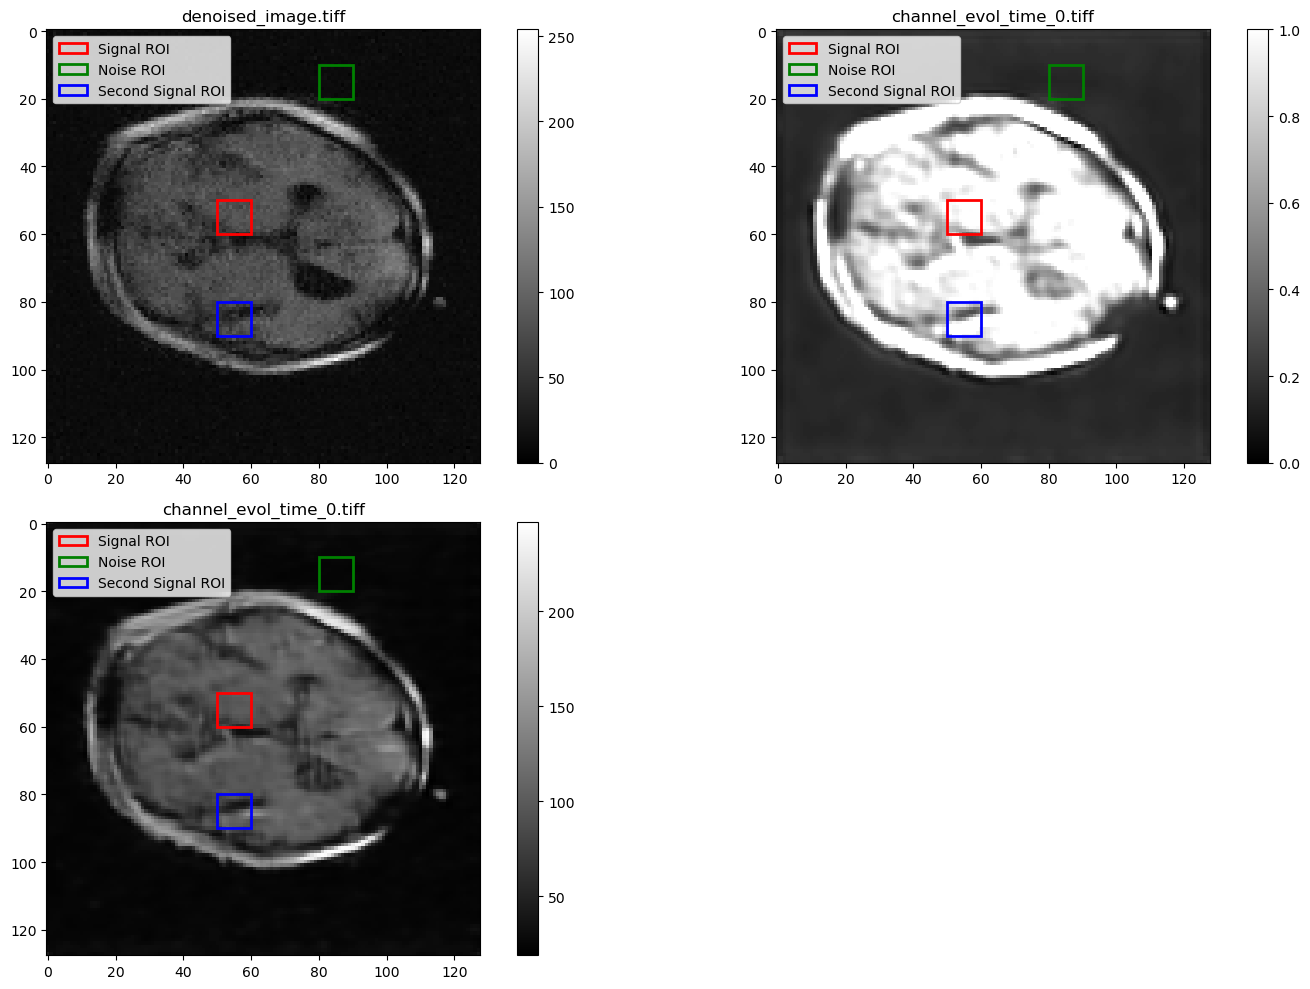

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords):
    """
    Calculates SNR and CNR for a given image with specified ROIs.

    Args:
        image_path (str): Path to the image file.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for CNR calculation.

    Returns:
        tuple: A tuple containing SNR and CNR values (SNR, CNR).
    """

    image = imread(image_path)

    # Adjust for grayscale (2D) or color (3D) images
    if image.ndim == 2:  # Grayscale image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width]
    else:  # Color image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width, :]

    x, y, width, height = roi_coords
    roi_signal = slice_func(x, y, width, height)
    mean_signal = np.mean(roi_signal)

    x, y, width, height = noise_coords
    roi_noise = slice_func(x, y, width, height)
    std_noise = np.std(roi_noise)

    snr = mean_signal / std_noise if std_noise != 0 else np.inf

    x, y, width, height = roi2_coords
    roi2_signal = slice_func(x, y, width, height)
    mean_signal2 = np.mean(roi2_signal)

    cnr = (mean_signal - mean_signal2) / std_noise if std_noise != 0 else np.inf

    return snr, cnr

def visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords):
    """
    Visualizes all images with ROIs highlighted.

    Args:
        image_paths (list): List of paths to image files.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for visualization.
    """

    num_images = len(image_paths)
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows

    plt.figure(figsize=(15, nrows * 5))  # Adjust the figure size as needed

    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)

        # Check the dimension of the image and adjust accordingly
        if image.ndim == 2:  # Grayscale image
            plt.imshow(image, cmap='gray')
        else:  # Color image, displaying the first channel
            plt.imshow(image[:, :, 0], cmap='gray')

        plt.colorbar()

        # Draw the ROIs
        plt.gca().add_patch(plt.Rectangle((roi_coords[0], roi_coords[1]), roi_coords[2], roi_coords[3], edgecolor='red', facecolor='none', linewidth=2, label='Signal ROI'))
        plt.gca().add_patch(plt.Rectangle((noise_coords[0], noise_coords[1]), noise_coords[2], noise_coords[3], edgecolor='green', facecolor='none', linewidth=2, label='Noise ROI'))
        plt.gca().add_patch(plt.Rectangle((roi2_coords[0], roi2_coords[1]), roi2_coords[2], roi2_coords[3], edgecolor='blue', facecolor='none', linewidth=2, label='Second Signal ROI'))

        # Set labels for ROIs
        plt.legend()

        # Optional: Set title to the image file name or any identifier
        title = image_path.split('/')[-1]  # Extract the file name as title
        plt.title(title)

    plt.tight_layout()
    plt.show()

# Example usage
image_paths = [
    '../Experiments/DenoisedImages/RealPatientDataDenoising/Patch2Self/denoised_image.tiff',
    '../Experiments/DenoisedImages/RealPatientDataDenoising/NoisyData_N2S/channel_evol_time_0.tiff',
    '../Experiments/DenoisedImages/RealPatientDataDenoising/NoisyData_N2F/channel_evol_time_0.tiff']
roi_coords = (50, 50, 10, 10)
noise_coords = (80, 10, 10, 10)
roi2_coords = (50, 80, 10, 10)

for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")

visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords)






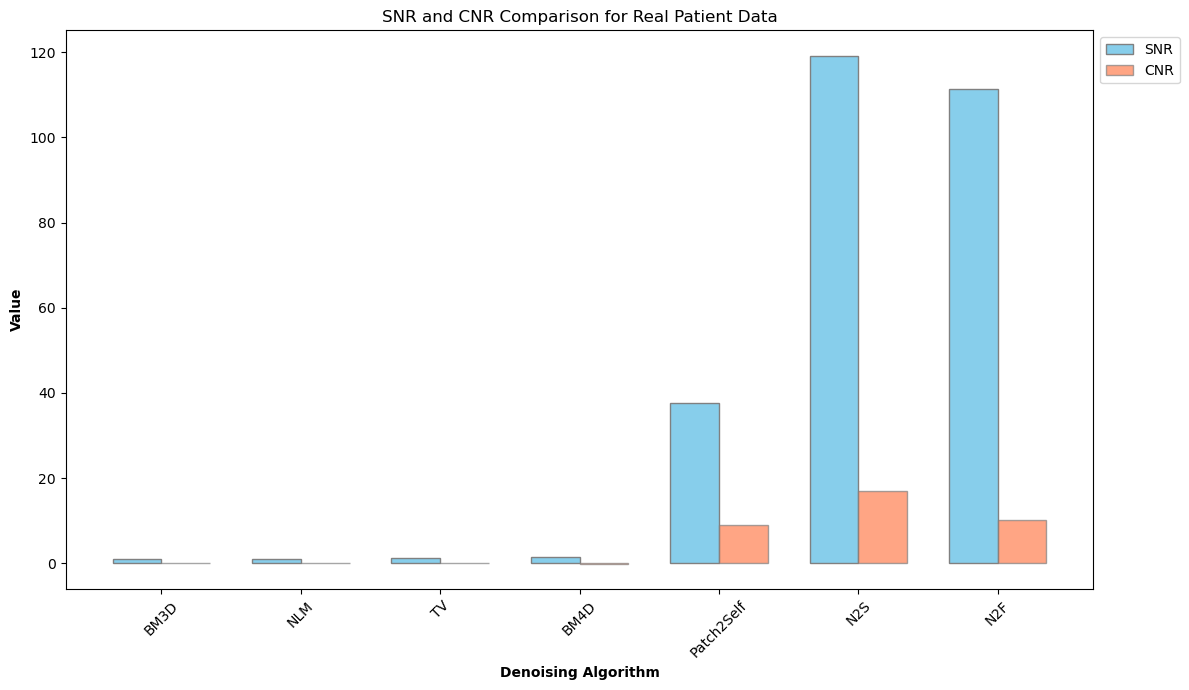

In [2]:
import matplotlib.pyplot as plt
import numpy as np


algorithms = ["BM3D", "NLM", "TV", "BM4D", "Patch2Self", "N2S", "N2F"]

# Updated SNR values to include Patch2Self, N2S, and N2F
snrs = [1.1508561378990079, 1.1365089669250816, 1.2555774196741991, 1.4356523775008614, 37.745080797395495, 119.13431549072266, 111.4233343187472]

# Updated CNR values to include Patch2Self, N2S, and N2F
cnrs = [0.04956639634020365, 0.04985769108234748, 0.05702005813812822, -0.020106113520649532, 9.097557377628045, 16.95145034790039, 10.203514204805114]

# Creating a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 7))

# Setting the positions of the bars
barWidth = 0.35  # Width of the bars
r1 = np.arange(len(snrs))  # Positions of bars for SNR
r2 = [x + barWidth for x in r1]  # Positions of bars for CNR

# Making the plot
ax1.bar(r1, snrs, color='skyblue', width=barWidth, edgecolor='grey', label='SNR')
ax1.bar(r2, cnrs, color='coral', width=barWidth, edgecolor='grey', label='CNR', alpha=0.7)

# Adding labels
plt.xlabel('Denoising Algorithm', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(snrs))], algorithms, rotation=45)
plt.ylabel('Value', fontweight='bold')
plt.title('SNR and CNR Comparison for Real Patient Data')

# Adding a legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()
